In [1]:
#Various NLTK Translation Metrics
##https://www.nltk.org/api/nltk.translate.html
#Meteor for example
#https://www.nltk.org/_modules/nltk/translate/meteor_score.html
#how to calcualte the blue score
#https://machinelearningmastery.com/calculate-bleu-score-for-text-python/
#vaious loss functions
##https://towardsdatascience.com/creating-custom-loss-functions-using-tensorflow-2-96c123d5ce6c
#custom calback
#https://www.tensorflow.org/guide/keras/custom_callback
#Smoothing function
#https://stackoverflow.com/questions/46444656/bleu-scores-could-i-use-nltk-translate-bleu-score-sentence-bleu-for-calculating

In [34]:
import nltk
from nltk.translate.bleu_score import sentence_bleu 
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.chrf_score import sentence_chrf
from nltk.translate.gleu_score import sentence_gleu
from nltk.translate.meteor_score import single_meteor_score
from nltk.translate.nist_score import sentence_nist
from nltk.translate.ribes_score import sentence_ribes
from nltk.tokenize import word_tokenize
nltk.download('wordnet') #reqired for meteor
import pickle
import string
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from tqdm import tqdm

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/avielstein/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
def Evaluate(reference, hypothesis, d):
    
    local=[]
    
    #BLEU structure
    #references -- (list(list(str))) – reference sentences
    #hypothesis (list(str)) – a hypothesis sentence
    
    average_bleu=[]
    
    #BLEU - Smoothing Method 1
    try:
        score = sentence_bleu(reference, hypothesis, smoothing_function=SmoothingFunction().method1)
        d['BLUE_m1'].append(min(score,1))
        local.append(['BLUE_m1',min(score,1)])
        average_bleu.append(min(score,1))
    except Exception as e:
        local.append(['BLUE_m1',e])
        pass
        #d['BLUE_m1'].append(None)
    
    #BLEU - Smoothing Method 2
    try:
        score = sentence_bleu(reference, hypothesis, smoothing_function=SmoothingFunction().method2)
        d['BLUE_m2'].append(min(score,1))
        local.append(['BLUE_m2',min(score,1)])
        average_bleu.append(min(score,1))
    except Exception as e:
        local.append(['BLUE_m2',e])
        pass
        #d['BLUE_m2'].append(None)
        
    #BLEU - Smoothing Method 3
    try:
        score = sentence_bleu(reference, hypothesis, smoothing_function=SmoothingFunction().method3)
        d['BLUE_m3'].append(min(score,1))
        local.append(['BLUE_m3',min(score,1)])
        average_bleu.append(min(score,1))
    except Exception as e:
        local.append(['BLUE_m3',e])
        pass
        #d['BLUE_m3'].append(None)
    
    #BLEU - Smoothing Method 4
    try:
        score = sentence_bleu(reference, hypothesis, smoothing_function=SmoothingFunction().method4)
        d['BLUE_m4'].append(min(score,1))
        local.append(['BLUE_m4',min(score,1)])
        average_bleu.append(min(score,1))
    except Exception as e:
        local.append(['BLUE_m4',e])
        pass
        #d['BLUE_m4'].append(None)
    
    #BLEU - Smoothing Method 5
    try:
        score = sentence_bleu(reference, hypothesis, smoothing_function=SmoothingFunction().method5)
        d['BLUE_m5'].append(min(score,1))
        local.append(['BLUE_m5',min(score,1)])
        average_bleu.append(min(score,1))
    except Exception as e:
        local.append(['BLUE_m5',e])
        pass
        #d['BLUE_m5'].append(None)
        
    #BLEU - Smoothing Method 6
    try:
        score = sentence_bleu(reference, hypothesis, smoothing_function=SmoothingFunction().method6)
        d['BLUE_m6'].append(min(score,1))
        local.append(['BLUE_m6',min(score,1)])
        average_bleu.append(min(score,1))
    except Exception as e:
        local.append(['BLUE_m6',e])
        pass
        #d['BLUE_m6'].append(None)
        
    #BLEU - Smoothing Method 7
    try:
        score = sentence_bleu(reference, hypothesis, smoothing_function=SmoothingFunction().method7)
        d['BLUE_m7'].append(min(score,1))
        local.append(['BLUE_m7',min(score,1)])
        average_bleu.append(min(score,1))
    except Exception as e:
        local.append(['BLUE_m7',e])
        pass
        #d['BLUE_m7'].append(None)

        
    #AVERAGE OF BLEU SCORE
    try:
        score = sum(average_bleu)/len(average_bleu)
        d['BLUE'].append(score)
        local.append(['BLUE',score])
    except Exception as e:
        local.append(['BLUE',e])
        pass
    
    #CHRF
    #references (list(str) / str) – reference sentence
    #hypothesis (list(str) / str) – a hypothesis sentence
    chrf_reference = reference[0]
    chrf_hypothesis = hypothesis
    try:
        score = sentence_chrf(chrf_reference, chrf_hypothesis)
        d['CHRF'].append(min(score,1))
        local.append(['CHRF',min(score,1)])
    except Exception as e:
        local.append(['CHRF',e])
        pass
        #d['CHRF'].append(None)

    #GLUE
    #references (list(list(str))) – a list of reference sentences
    #hypothesis (list(str)) – a hypothesis sentence
    try:
        score = sentence_gleu(reference, hypothesis)
        d['GLUE'].append(min(score,1))
        local.append(['GLUE',min(score,1)])
    except Exception as e:
        local.append(['GLUE',e])
        pass
        #d['GLUE'].append(None)

    #METEOR
    #references (list(str)) – reference sentences 
    #hypothesis (str) – a hypothesis sentence
    meteor_reference = ' '.join(reference[0])
    meteor_hypothesis = ' '.join(hypothesis)
    try:
        score = single_meteor_score(meteor_reference, meteor_hypothesis)
        d['METEOR'].append(min(score,1))
        local.append(['METEOR',min(score,1)])
    except Exception as e:
        local.append(['METEOR',e])
        pass
        #d['METEOR'].append(None)

    #NIST -- excluded because not sure how to compare
    #references (list(list(str))) – reference sentences
    #hypothesis (list(str)) – a hypothesis sentence
    '''
    try:
        score = sentence_nist(reference, hypothesis)
        d['NIST'].append(score)
        local.append(['NIST',score])
    except Exception as e:
        local.append(['NIST',e])
        pass
        #d['NIST'].append(None)
    '''

    #RIBES
    #references (list(list(str))) - a list of reference sentences
    #hypothesis (list(str)) – a hypothesis sentence
    try:
        score = sentence_ribes(reference, hypothesis)
        d['RIBES'].append(min(score,1))
        local.append(['RIBES',min(score,1)])
    except Exception as e:
        local.append(['RIBES',e])
        pass
        #d['RIBES'].append(None)

    
    #print(local)
        
reference = [['this', 'is', 'a', 'hard','test']]
hypotheses = [['that', 'is', 'a','hard', 'test'],
              ['this', 'is', 'a', 'test'],
              ['this', 'is', 'a','difficult', 'test'],
              ['this', 'test', 'is','hard'],
              ['this', 'test', 'is','a','hard','one']]

d={'BLUE':[],'BLUE_m1':[],'BLUE_m2':[],'BLUE_m3':[],'BLUE_m4':[],
   'BLUE_m5':[],'BLUE_m6':[],'BLUE_m7':[],'CHRF':[],
   'GLUE':[], 'METEOR':[],'NIST':[], 'RIBES':[]}

for hypothesis in hypotheses:
    Evaluate(reference,hypothesis,d)
    #input()

In [93]:
#LOAD IN THE DATA

#filenames = eval_preds.pkl, eval_trues.pkl objective_results.pkl eval_codes.pkl
#file_name = 'eval_preds.pkl'
#file_name = 'eval_trues.pkl'
#file_name = 'objective_results.pkl'


#get all the original comments
comments_file = 'eval_trues.pkl'
open_comment_file = open(comments_file, "rb")
comments = pickle.load(open_comment_file)
open_comment_file.close()

#get all the generated comments
generated_file = 'eval_preds.pkl'
open_generated_file = open(generated_file, "rb")
generated = pickle.load(open_generated_file)
open_generated_file.close()



In [41]:
def clean_corpus(corpus1,corpus2):
    clean1 = []
    clean2 = []
    
    #assumes len(corpus1)==len(corpus2)
    for i in tqdm(range(len(corpus1))):
        
        sent1 = corpus1[i]
        tokens1 = word_tokenize(sent1.lower())
        words1 = [word for word in tokens1 if word.isalpha()]
        clean1.append(words1)
        
        sent2 = corpus2[i]
        tokens2 = word_tokenize(sent2.lower())
        words2 = [word for word in tokens2 if word.isalpha()]
        clean2.append(words2)
        
    return clean1,clean2

print('cleaning data')

clean_comments, clean_generated = clean_corpus(comments,generated)

 15%|█▍        | 741/4980 [00:00<00:01, 3661.70it/s]

cleaning data


100%|██████████| 4980/4980 [00:01<00:00, 3528.11it/s]


In [98]:

d = {'BLUE':[],'BLUE_m1':[],'BLUE_m2':[],'BLUE_m3':[],'BLUE_m4':[],
     'BLUE_m5':[],'BLUE_m6':[],'BLUE_m7':[],'CHRF':[],
     'GLUE':[], 'METEOR':[], 'RIBES':[]}



for i in tqdm(range(len(clean_comments))):
    #print(clean_comments[i])
    #print(clean_generated[i])
    Evaluate([clean_comments[i]],clean_generated[i],d)
    #input()
    

100%|██████████| 4980/4980 [01:38<00:00, 50.77it/s] 


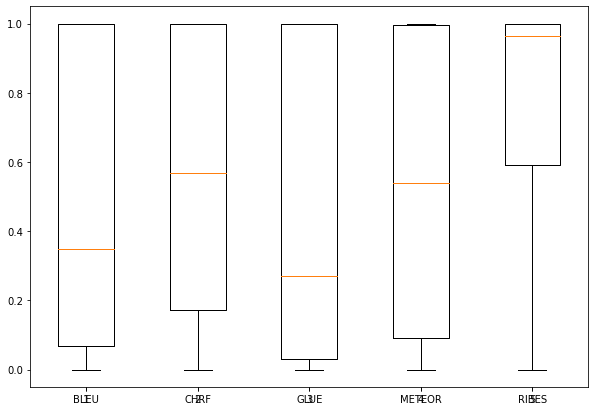

In [99]:
#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#Boxplots for diffent evaluation techniques
np.random.seed(10)

data = [d['BLUE'],d['CHRF'],d['GLUE'], d['METEOR'], d['RIBES']]

fig = plt.figure(figsize =(10, 7)) 
plt.xticks([1, 2, 3, 4,5], ['BLEU','CHRF','GLUE', 'METEOR', 'RIBES'])
  
# Creating plot 
plt.boxplot(data) 
  
# show plot 
plt.show() 